In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
import json
from datetime import datetime
from tqdm import tqdm
from pprint import pprint
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# training and Testing directories
training_dir = os.path.join("Datasets", "Training")
testing_dir = os.path.join("Datasets", "Testing")
if not os.path.isdir(training_dir):
    raise Exception("ERROR: training dataset not found")
if not os.path.isdir(testing_dir):
    raise Exception("ERROR: testing dataset not found")

## Part 1: Analyzing the data

Size/RAM experiments: loading all training as lists requires approximately 10.3 GB of RAM. It is suggested to only extract the features you need each time

In [2]:
# iterate over all hashtag files 
for root, dirs, files in os.walk(training_dir, topdown=False):
    for file in files:
        print(os.path.join(root, file))

Datasets\Training\tweets_#gohawks.txt
Datasets\Training\tweets_#gopatriots.txt
Datasets\Training\tweets_#nfl.txt
Datasets\Training\tweets_#patriots.txt
Datasets\Training\tweets_#sb49.txt
Datasets\Training\tweets_#superbowl.txt


##### Question 1 and 2: Get statistics

Parsing gohawks...
	----------
	number of tweets in hashtag: 169122
	number of hours in hashtag: 578.2188888888888
	average tweets per hour: 292.48785062173687
	----------
	average followers per tweeter: 1586.931285839246
	----------
	average retweets per tweet: 2.0132093991319877
	----------

Parsing gopatriots...
	----------
	number of tweets in hashtag: 23511
	number of hours in hashtag: 574.0733333333334
	average tweets per hour: 40.95469800606194
	----------
	average followers per tweeter: 1305.8648025717232
	----------
	average retweets per tweet: 1.4081919101697078
	----------

Parsing nfl...
	----------
	number of tweets in hashtag: 233022
	number of hours in hashtag: 586.9255555555555
	average tweets per hour: 397.0213901819841
	----------
	average followers per tweeter: 4355.590525997321
	----------
	average retweets per tweet: 1.5344602655543254
	----------

1421222404
2015-01-14 00:00:04


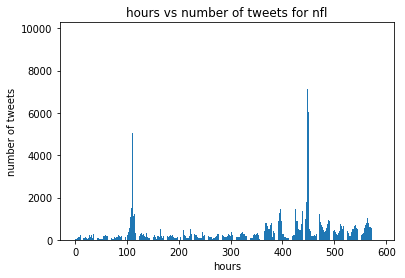

Parsing patriots...
	----------
	number of tweets in hashtag: 440621
	number of hours in hashtag: 586.795
	average tweets per hour: 750.89426460689
	----------
	average followers per tweeter: 1697.2760565460703
	----------
	average retweets per tweet: 1.7852871288476946
	----------

Parsing sb49...
	----------
	number of tweets in hashtag: 743649
	number of hours in hashtag: 582.4058333333334
	average tweets per hour: 1276.8570598680474
	----------
	average followers per tweeter: 2342.8901806215313
	----------
	average retweets per tweet: 2.52713444111402
	----------

Parsing superbowl...
	----------
	number of tweets in hashtag: 1213813
	number of hours in hashtag: 585.7836111111111
	average tweets per hour: 2072.11840170408
	----------
	average followers per tweeter: 3652.431497619542
	----------
	average retweets per tweet: 2.3911895819207736
	----------

1421223187
2015-01-14 00:13:07


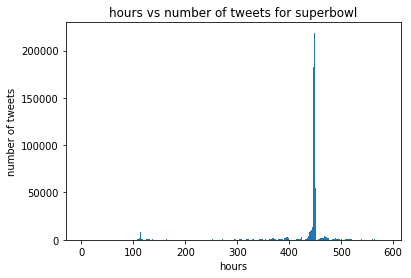

In [22]:
only_plot = ['superbowl', 'nfl']
file_lengths = {
    'superbowl': 1213813,
    'nfl': 233022
}

# iterate over all hashtag files 
for root, dirs, files in os.walk(training_dir, topdown=False):
    for file in files:
        filename = os.path.splitext(file)[0].replace('tweets_#', '')
        print('Parsing {}...'.format(filename))
        
        # only extracting specific features from the tweet json objects
        citation_dates = []
        followers = []
        authors = []
        retweets = []
        
        # open the file and read all lines:
        with open(os.path.join(root, file), "r", encoding="utf-8") as hashtag:
            # read line-by-line
            for line in hashtag:
                json_obj = json.loads(line)
                
                # get citation date
                citation_date = json_obj['citation_date']
                citation_dates.append(citation_date)
                
                if json_obj['tweet']['user']['id'] not in authors:
                    # get number of authors
                    authors.append(json_obj['tweet']['user']['id'])
                    
                    # get number of followers for the author
                    followers.append(json_obj['author']['followers'])
                
                # get retweets
                retweet_total = json_obj['metrics']['citations']['total']
                retweets.append(retweet_total)
        
        # processing citation feature
        print('\t'+'-'*10)
        citation_dates = np.array(citation_dates)
        print('\tnumber of tweets in hashtag: {}'.format(len(citation_dates)))
        
        min_date = np.min(citation_dates)
        max_date = np.max(citation_dates)
        span_hours = (max_date - min_date)/3600
        
        print('\tnumber of hours in hashtag: {}'.format(span_hours))
        
        tweets_per_hour = len(citation_dates) / span_hours
        print('\taverage tweets per hour: {}'.format(tweets_per_hour))
        
        # processing followers feature
        print('\t'+'-'*10)
        follower_avg = sum(followers)/len(authors)
        print('\taverage followers per tweeter: {}'.format(follower_avg))
        
        # processing retweets feature
        print('\t'+'-'*10)
        retweet_avg = sum(retweets)/len(citation_dates)
        print('\taverage retweets per tweet: {}'.format(retweet_avg))
        
        print('\t'+'-'*10)
        print('')
        
        if filename in only_plot:
            citation_dates = np.array(citation_dates)
            min_date = np.min(citation_dates)
            max_date = np.max(citation_dates)
            print(min_date)
            print(datetime.fromtimestamp(min_date))

            hour_slots = int((max_date - min_date) / 3600 + 1)
            slots = np.zeros(hour_slots)
            for date in citation_dates:
                slots[int((date-min_date)/3600)] += 1 # add the tweet to the appropriate timeslot
                
            plt.bar(np.arange(len(slots)), slots)
            plt.xlabel('hours')
            plt.ylabel('number of tweets')
            plt.title('hours vs number of tweets for '+ filename)
            plt.show()